# Classification and Regression of the White Wine Quality Dataset

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.feature_selection import RFE
from statsmodels import api as sm

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# Data Analysis

In [2]:
white = pd.read_csv('winequality-white.csv', sep=';')
white.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
white.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3955,7.0,0.16,0.30,2.60,0.043,34.0,90.0,0.99047,2.88,0.47,11.2,6
3496,6.0,0.24,0.28,3.95,0.038,61.0,134.0,0.99146,3.30,0.54,11.3,7
3519,6.9,0.33,0.62,7.50,0.038,46.0,132.0,0.99143,3.23,0.43,13.4,7
452,5.9,0.46,0.14,2.70,0.042,27.0,160.0,0.99310,3.46,0.51,10.6,7
662,7.0,0.57,0.10,8.30,0.094,23.0,188.0,0.99720,3.40,0.47,9.2,4
4620,6.4,0.38,0.19,4.50,0.038,36.0,119.0,0.99151,3.07,0.42,11.2,6
2860,7.3,0.21,0.33,1.00,0.037,66.0,144.0,0.99230,3.11,0.52,10.2,6
3869,6.2,0.22,0.30,12.40,0.054,108.0,152.0,0.99728,3.10,0.47,9.5,6
3292,6.6,0.28,0.41,7.00,0.046,59.0,194.0,0.99558,3.14,0.48,9.4,5
1369,7.4,0.64,0.47,14.15,0.168,42.0,185.0,0.99840,2.90,0.49,9.3,5


In [3]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [34]:
white_correlation=white.corr()
white_correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


# Data Visualisation

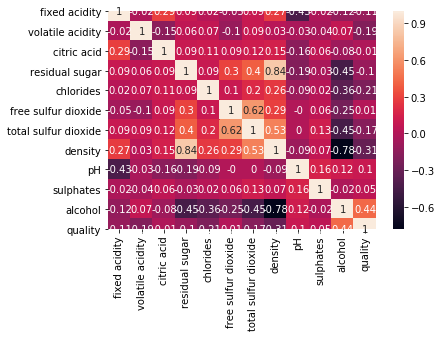

In [6]:
sns.heatmap(white.corr().round(2), annot=True)

In [13]:
px.histogram(white, x='pH')

In [17]:
px.histogram(white, x='quality')

In [18]:
px.histogram(white, x='alcohol')

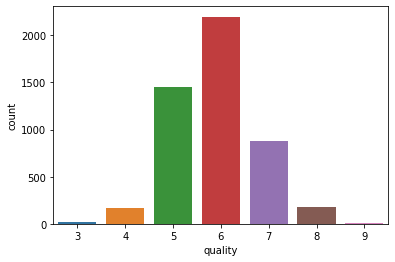

In [19]:
sns.countplot(x='quality', data=white)

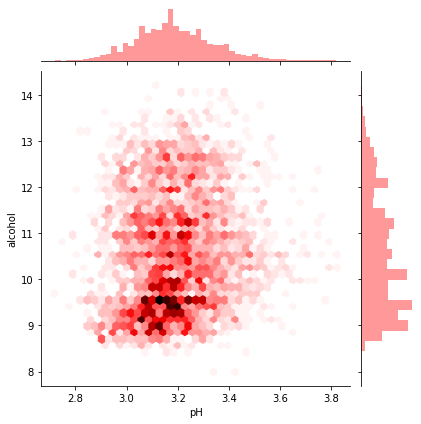

In [33]:
sns.jointplot('pH', 'alcohol', data=white, kind='hex', color='red')

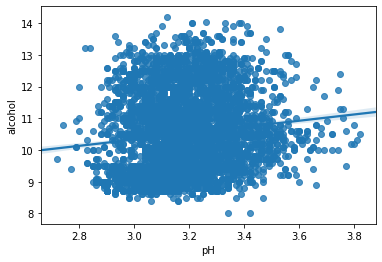

In [25]:
sns.regplot('pH', 'alcohol', data=white)

In [27]:
px.scatter(white,x='alcohol', color='quality')

In [31]:
px.scatter(white,x='pH', color='quality')

# Feature Selection

In [37]:
# Using the Filter Method for Feature Selection. This will draw on the higher the correlation;the more-relevant the feature
cor_target = abs(white_correlation['quality'])
relevant_features = cor_target[cor_target>0.4]
relevant_features

alcohol    0.435575
quality    1.000000
Name: quality, dtype: float64

In [40]:
X = white.drop('quality', axis=1)
y= white['quality']

In [43]:
# Wrapper Method - Backward Elimination
X_1 = sm.add_constant(X)

olsModel = sm.OLS(y,X_1).fit()

olsModel.pvalues


C:\Users\Gloria\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [55]:
cols = list(X.columns)
pmax = 1

while(len(cols)>0):
    p=[]
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y, X_1).fit()
    p= pd.Series(model.pvalues.values[1:], index=cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()

    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break


selected_features_BE = cols
print('Original Features:')
print(X.columns.values)
print('Selected Features: ')
print(selected_features_BE)

Original Features:
['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Selected Features: 
['fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
C:\Users\Gloria\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [59]:
# Recursive Feature Elimination
#It will rank featues according to importance after recursively removing attributes
model1 = GradientBoostingRegressor()

rfe = RFE(model1, 6)

X_rfe = rfe.fit_transform(X,y)

model1.fit(X_rfe, y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True False  True False False False False  True]
[1 1 1 1 2 1 4 5 3 6 1]


In [68]:
nof_list = np.arange(1,11)
high_score = 0
#Variable to store optimum features
nof=0
score_list=[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
    #model2 = LinearRegression()
    rfe = RFE(model1, nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    model1.fit(X_train_rfe, y_train)
    score = model1.score(X_test_rfe, y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print('Optimum number of Features: %d' %nof)
print('Score with %d features: %f' %(nof, high_score))     

Optimum number of Features: 10
Score with 10 features: 0.398030


In [70]:
cols2 = list(X.columns)

rfe = RFE(model1, 10)

X_rfe = rfe.fit_transform(X,y)

model2.fit(X_rfe, y)

temp = pd.Series(rfe.support_, index=cols2)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'alcohol'],
      dtype='object')


In [73]:
# Embedded Method
randForest = RandomForestRegressor()
lass = Lasso()
dTree = DecisionTreeRegressor()
lass.fit(X,y)
print(lass.alpha)
print(lass.score(X,y))
coef = pd.Series(lass.coef_, index=X.columns)

1.0
0.04035361561270301


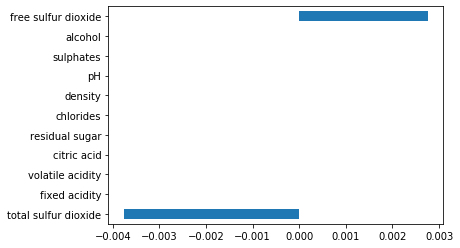

In [74]:
imp_coef = coef.sort_values()
imp_coef.plot(kind='barh')

# Model Building

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()
scaler.fit(white)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
X2 = white.drop('quality', axis=1)
y2= white['quality']

In [6]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=100)

## Classification

## Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
treeClass = DecisionTreeClassifier()

In [20]:
treeClass.fit(X2_train, y2_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [22]:
treePred = treeClass.predict(X2_test)

In [23]:
print(metrics.mean_squared_error(y2_test, treePred))
print(metrics.r2_score(y2_test,treePred))

0.6598639455782312
0.12634886245830557


In [25]:
treePred

array([7, 5, 5, ..., 5, 6, 5], dtype=int64)

In [44]:
print(confusion_matrix(y2_test,treePred))
print(classification_report(y2_test,treePred))

[[  0   1   3   2   1   0   0]
 [  1  19  18   5   2   0   0]
 [  0  16 268 104  16   4   0]
 [  0  16 150 443  71  15   0]
 [  0   2  19  71 160  13   0]
 [  0   0   4  13   9  22   0]
 [  0   1   0   0   0   1   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.35      0.42      0.38        45
           5       0.58      0.66      0.62       408
           6       0.69      0.64      0.66       695
           7       0.62      0.60      0.61       265
           8       0.40      0.46      0.43        48
           9       0.00      0.00      0.00         2

    accuracy                           0.62      1470
   macro avg       0.38      0.40      0.39      1470
weighted avg       0.62      0.62      0.62      1470



## K Means Classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
kmeans = KNeighborsClassifier(n_neighbors=7)

In [39]:
kmeans.fit(X2_train, y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [40]:
kPred = kmeans.predict(X2_test)

In [41]:
print(metrics.mean_squared_error(y2_test, kPred))
print(metrics.r2_score(y2_test,kPred))

0.8931972789115646
-0.18258138514664424


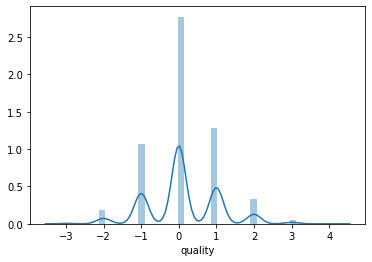

In [42]:
sns.distplot(y2_test - kPred)

In [43]:
print(confusion_matrix(y2_test,kPred))
print(classification_report(y2_test,kPred))

[[  0   1   5   1   0   0   0]
 [  0   3  29  12   1   0   0]
 [  0  11 197 173  25   2   0]
 [  0   5 189 427  67   7   0]
 [  0   0  58 123  80   4   0]
 [  0   0  12  23   7   6   0]
 [  0   0   1   1   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.15      0.07      0.09        45
           5       0.40      0.48      0.44       408
           6       0.56      0.61      0.59       695
           7       0.44      0.30      0.36       265
           8       0.32      0.12      0.18        48
           9       0.00      0.00      0.00         2

    accuracy                           0.49      1470
   macro avg       0.27      0.23      0.24      1470
weighted avg       0.47      0.49      0.47      1470

C:\Users\Gloria\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with n

## Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier()
rfc.fit(X2_train, y2_train)

C:\Users\Gloria\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
rfc_pred = rfc.predict(X2_test)
rfc_pred

array([6, 5, 5, ..., 6, 6, 5], dtype=int64)

In [51]:
print(confusion_matrix(y2_test,rfc_pred))
print('\n')
print(classification_report(y2_test,rfc_pred))

[[  0   0   3   3   1   0   0]
 [  0  15  18   8   3   1   0]
 [  0   8 292 104   3   1   0]
 [  0   5 119 522  48   1   0]
 [  0   0  16 103 145   1   0]
 [  0   0   3  14  14  17   0]
 [  0   0   0   1   1   0   0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.54      0.33      0.41        45
           5       0.65      0.72      0.68       408
           6       0.69      0.75      0.72       695
           7       0.67      0.55      0.60       265
           8       0.81      0.35      0.49        48
           9       0.00      0.00      0.00         2

    accuracy                           0.67      1470
   macro avg       0.48      0.39      0.42      1470
weighted avg       0.67      0.67      0.67      1470

C:\Users\Gloria\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with

## Support Vector Machines

In [52]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X2_train, y2_train)
sv_pred = clf.predict(X2_test)

C:\Users\Gloria\Miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



In [53]:
print(confusion_matrix(y2_test,sv_pred))
print('\n')
print(classification_report(y2_test,sv_pred))

[[  0   1   0   6   0   0   0]
 [  0   2  18  25   0   0   0]
 [  0   0 206 196   6   0   0]
 [  0   0 110 542  42   1   0]
 [  0   0  29 149  86   1   0]
 [  0   0   2  34   4   8   0]
 [  0   0   0   2   0   0   0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.67      0.04      0.08        45
           5       0.56      0.50      0.53       408
           6       0.57      0.78      0.66       695
           7       0.62      0.32      0.43       265
           8       0.80      0.17      0.28        48
           9       0.00      0.00      0.00         2

    accuracy                           0.57      1470
   macro avg       0.46      0.26      0.28      1470
weighted avg       0.58      0.57      0.55      1470

C:\Users\Gloria\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with

# Regression

In [7]:
lr = LinearRegression()
lr.fit(X2_train, y2_train)
print(lr.intercept_)
lr_predictions = lr.predict(X2_test)
print(metrics.mean_squared_error(y2_test, lr_predictions))
print(metrics.r2_score(y2_test,lr_predictions))


147.5394357411659
0.5679515772501587
0.2480396226249434


In [45]:
lr.score(X2_train, y2_train)

0.2936469350824441

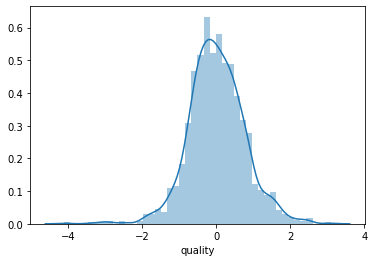

In [35]:
sns.distplot(y2_test - lr_predictions)

## Gradient Boosting Regression

In [8]:
gradBoost = GradientBoostingRegressor()
gradBoost.fit(X2_train, y2_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
grad_Predictions = gradBoost.predict(X2_test)

In [11]:
print(metrics.mean_squared_error(y2_test, grad_Predictions))
print(metrics.r2_score(y2_test,grad_Predictions))

0.46001232903089684
0.39094975981923763


## Decision Tree Regressor

In [12]:
decTree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [13]:
decTree.fit(X2_train, y2_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [16]:
decTree_Predictions = decTree.predict(X2_test)

In [17]:
print(metrics.mean_squared_error(y2_test, decTree_Predictions))
print(metrics.r2_score(y2_test,decTree_Predictions))

0.5486770816059988
0.2735587999612754


## Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X2_train, y2_train)
logmodel.score(X2_train, y2_train)

C:\Users\Gloria\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Gloria\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



0.5233372228704785

In [55]:
logpredict = logmodel.predict(X2_test)

In [56]:
print(classification_report(y2_test, logpredict))

precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        45
           5       0.55      0.57      0.56       408
           6       0.54      0.79      0.64       695
           7       0.40      0.05      0.08       265
           8       0.00      0.00      0.00        48
           9       0.00      0.00      0.00         2

    accuracy                           0.54      1470
   macro avg       0.21      0.20      0.18      1470
weighted avg       0.48      0.54      0.47      1470

C:\Users\Gloria\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

